Total reward (clicks): 184
Ad 0: Successes = 4, Failures = 43
Ad 1: Successes = 6, Failures = 55
Ad 2: Successes = 1, Failures = 29
Ad 3: Successes = 165, Failures = 623
Ad 4: Successes = 8, Failures = 66


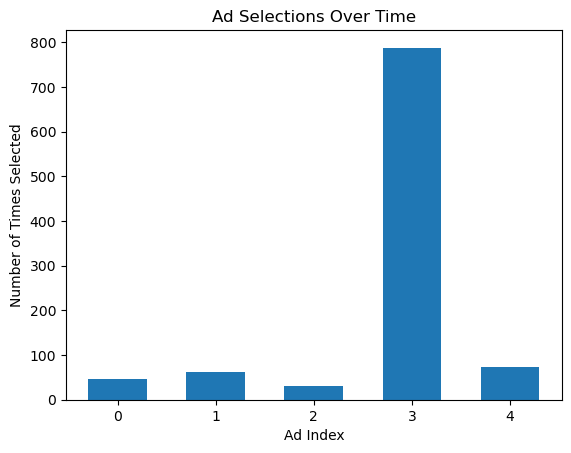

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

class ThompsonSamplingAdSelector:
    def __init__(self, n_ads):
        self.n_ads = n_ads
        self.successes = [0] * n_ads  
        self.failures = [0] * n_ads  

    def select_ad(self):
        sampled_theta = [
            np.random.beta(self.successes[i] + 1, self.failures[i] + 1)
            for i in range(self.n_ads)
        ]
        selected_ad = np.argmax(sampled_theta)
        return selected_ad

    def update(self, ad_index, reward):
        if reward == 1:
            self.successes[ad_index] += 1
        else:
            self.failures[ad_index] += 1

    def print_stats(self):
        for i in range(self.n_ads):
            print(f"Ad {i}: Successes = {self.successes[i]}, Failures = {self.failures[i]}")

if __name__ == "__main__":

    n_ads = 5
    n_rounds = 1000
    true_ctrs = [0.05, 0.13, 0.04, 0.20, 0.10]

    selector = ThompsonSamplingAdSelector(n_ads)
    total_rewards = 0
    selections = []

    for t in range(n_rounds):
        ad = selector.select_ad()
        reward = 1 if random.random() < true_ctrs[ad] else 0
        selector.update(ad, reward)
        total_rewards += reward
        selections.append(ad)

    print(f"Total reward (clicks): {total_rewards}")
    selector.print_stats()

    plt.hist(selections, bins=np.arange(n_ads + 1) - 0.5, rwidth=0.6)
    plt.title("Ad Selections Over Time")
    plt.xlabel("Ad Index")
    plt.ylabel("Number of Times Selected")
    plt.show()